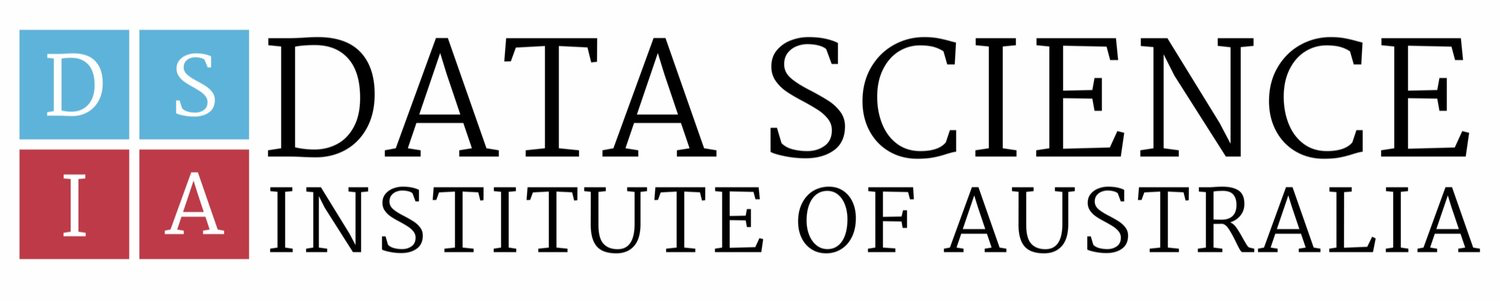

# Data Science and AI
## Lab 3.1.2: Exploring Data

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [1]:
from math import floor
from math import ceil
import numpy as np
import pandas as pd

In [2]:
# Cause plots to be displayed in the notebook:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import use
import seaborn as sns

In [3]:
# Override default figure sizing:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)
plt_backend = plt.get_backend()

## Data Profiling
We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.
- Load the file `bikeshare.csv` into a DataFrame named `bikes`, and check that it was loaded properly:

In [11]:
# insert code here
bikes = pd.read_csv('data/bikeshare.csv', header = 0)

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:
- Use `describe` to get the description of datasets.

In [8]:
# insert code here
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Continuous Data
We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).
- Use the `scatter` method of Pandas to create a scatter plot of `windspeed`:

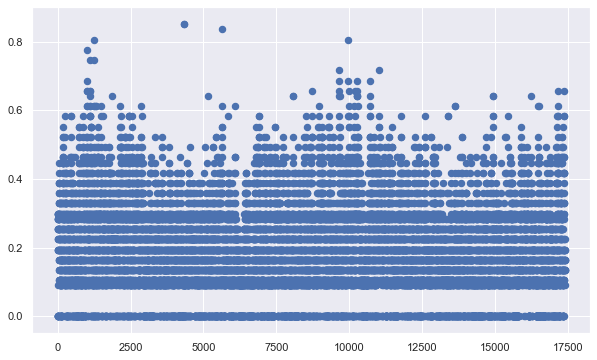

In [34]:
# insert code here
_ = plt.scatter(bikes.instant,bikes.windspeed, marker=None, linewidths=3, s=20, alpha = 1)

- The `scatter` method has varous parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:

In [ ]:
# insert code here

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for:
> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables.

- **Identify continuous variables**
- **Create histogram for those variables**

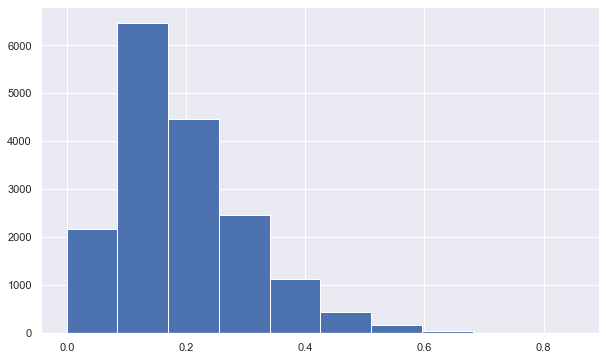

In [39]:
# insert code here continuouse variables: temp,atemp,hum,windspeed
_ = plt.hist(bikes.windspeed,bins = 10)

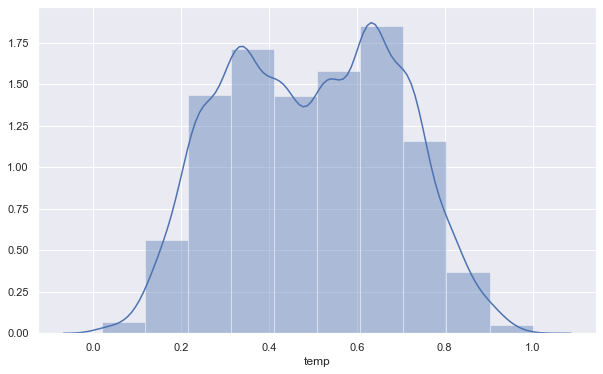

In [12]:
sns.distplot(bikes.temp, bins = 10)

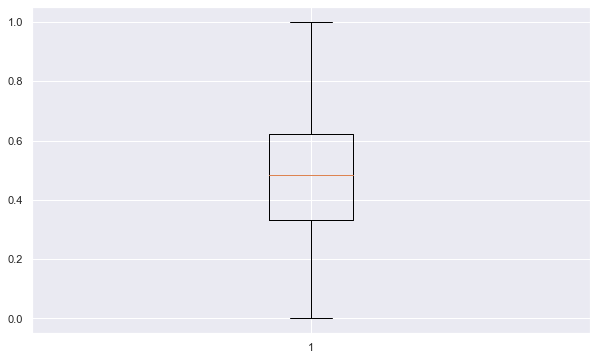

In [46]:
_ = plt.boxplot(bikes.atemp)

In [141]:
#_ = plt.boxplot(bikes[['atemp', 'windspeed']])

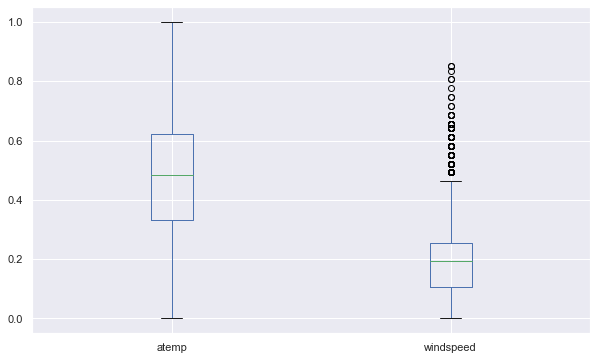

In [65]:
bikes[['atemp', 'windspeed']].plot.box()

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous **Iris** dataset gets loaded from the UCI repository:

In [79]:
iris_data.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [4]:
# insert code here
iris_data.groupby(['sepal_length', 'sepal_width']).mean().head()

NameError: name 'iris_data' is not defined

The Pandas `plot` method provides a quick way to produce a scatter plot:
- Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.

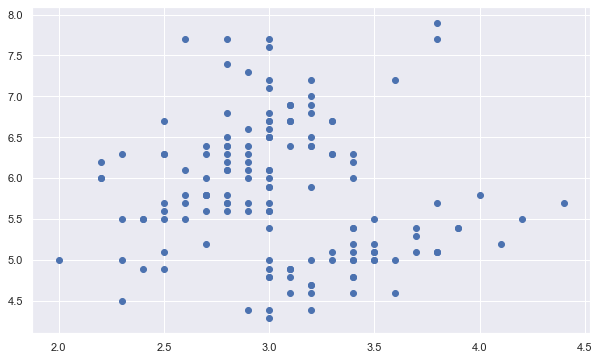

In [91]:
plt.scatter(iris_data.sepal_width,iris_data.sepal_length)

- Draw a Barplot showing sepal width and length using the Pandas plot method.

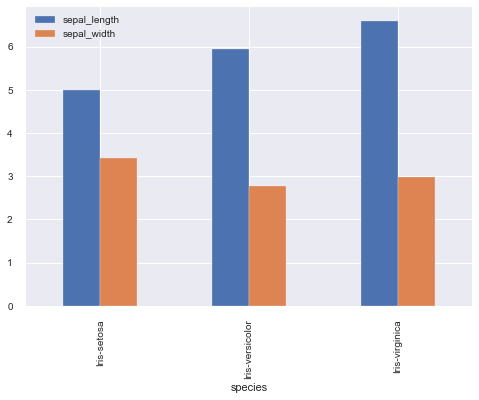

In [238]:
iris_data.groupby("species").agg({"sepal_length": 'mean','sepal_width':'mean'}).plot(kind="bar")
plt.show()

- Draw a Scatterplot showing sepal width and length using the Pandas plot method.
    - [BONUS] Set `title`, `xlabel`, `ylabel` to the plot

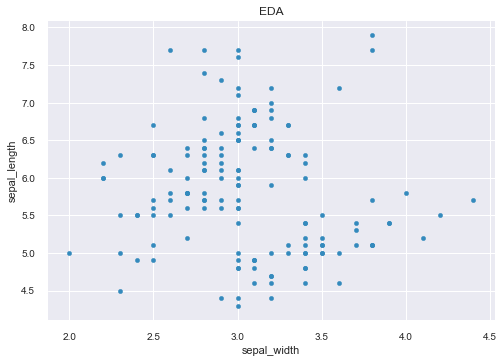

In [239]:
iris_data.plot.scatter(x="sepal_width", y="sepal_length", title = "EDA")

In this dataset we have also `petal_width`, `petal_length`. 
- Try to draw Scatterplot using these variables.

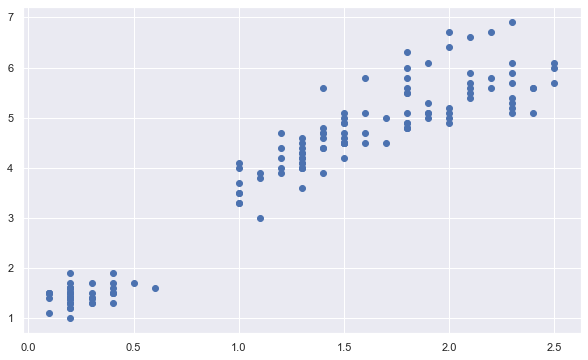

In [97]:
plt.scatter(iris_data.petal_width,iris_data.petal_length)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the `Seaborn` library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg=False`.
- Draw a Scatterplot showing sepal width and length.

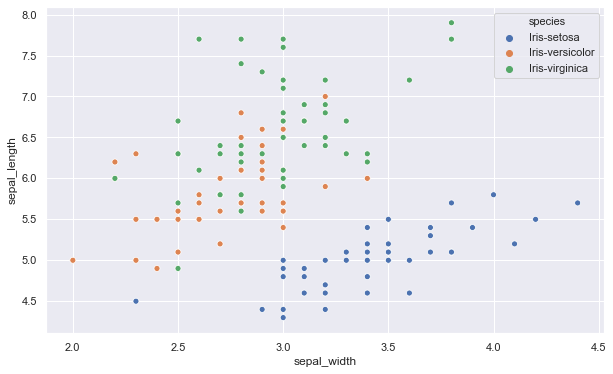

In [117]:
# insert code here
sns.scatterplot(iris_data.sepal_width,iris_data.sepal_length, hue=iris_data.species)

- [BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.

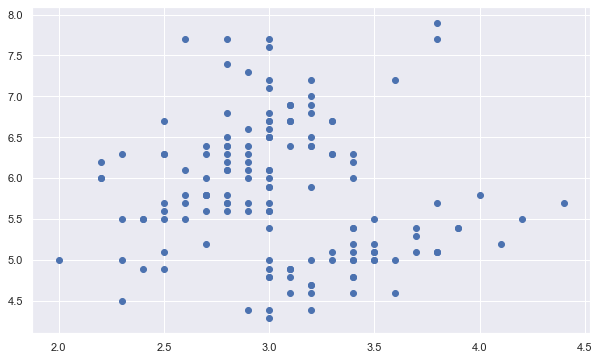

In [122]:
plt.scatter(iris_data.sepal_width,iris_data.sepal_length)

To find out why this function is called `lmplot`, try it again with `fit_reg=True`:
- Draw a Scatterplot showing sepal width and length:

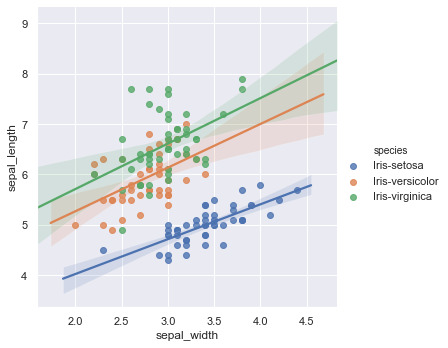

In [132]:
sns.lmplot("sepal_width","sepal_length",iris_data, hue="species")

The Seaborn `jointplot` function charts a correlation along with both distributions:
- Draw a `jointplot` showing sepal width and length:

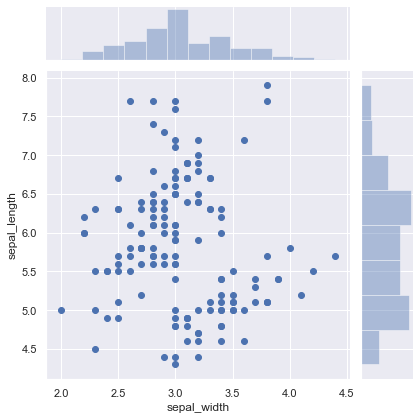

In [134]:
# insert code here
sns.jointplot("sepal_width","sepal_length",iris_data)

When we want to see all the correlations at once, we can use `pairplot`:
- Draw a `pairplot` of the dataset:

In [5]:
sns.pairplot(iris_data)

NameError: name 'iris_data' is not defined

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

In [6]:
sns.pairplot(iris_data, hue="species")

NameError: name 'iris_data' is not defined

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [138]:
# insert code here
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [153]:
airpass = pd.read_csv('data/AirPassengers.csv')
airpass.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [159]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [160]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [161]:
from datetime import datetime
print(ts[datetime(1949, 1, 1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [162]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

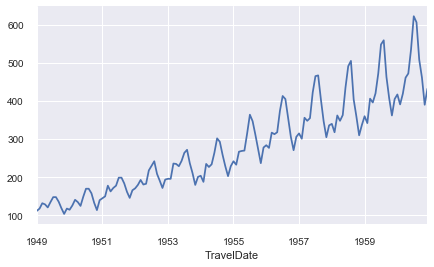

In [163]:
plt.figure(figsize=(7, 4))
ts.plot()
plt.show()

## Geospatial Data

Geospatial data is map-based (although what constitutes a **map** can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use `folium` for its breadth and its use of open-source data.

In [262]:
import folium

In [263]:
# Read SF Incidents data
crime_csv = 'data/SFPD_Incidents-Current_Year_2015.csv'

In [264]:
crime = pd.read_csv(crime_csv)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"


- Convert `Date` Column to DateTime and set as index 

In [266]:
crime['Date'] = pd.to_datetime(crime['Date'])

In [267]:
crime.set_index(keys=['Date'], inplace = True)

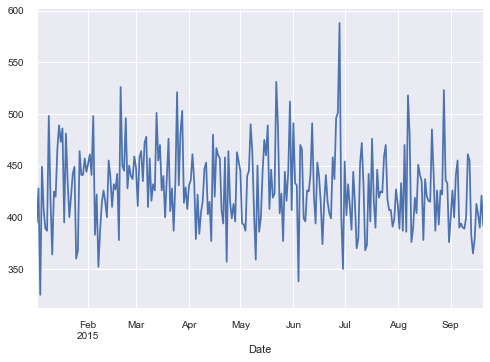

In [268]:
crime.groupby(crime.index).size().plot()
plt.show()

In [27]:
crime.groupby('Location').count().head()


NameError: name 'crime' is not defined

- Draw a timeseries plot to visualise number of crimes for each day.

In [269]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

crime = pd.read_csv(crime_csv,
                      parse_dates=['Date'],
                      index_col='Date',
                      date_parser=dateparse)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location
Date,,,,,,,,,,,
2015-09-20,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
2015-09-20,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"


In [270]:
ts = crime.groupby("Date").count()
ts.head()

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location
Date,,,,,,,,,,,
2015-01-02,395,395,395,395,395,395,395,395,395,395,395
2015-01-03,428,428,428,428,428,428,428,428,428,428,428
2015-01-04,325,325,325,325,325,325,325,325,325,325,325
2015-01-05,449,449,449,449,449,449,449,449,449,449,449
2015-01-06,407,407,407,407,407,407,407,407,407,407,407


In [271]:
ts1 = ts.IncidntNum

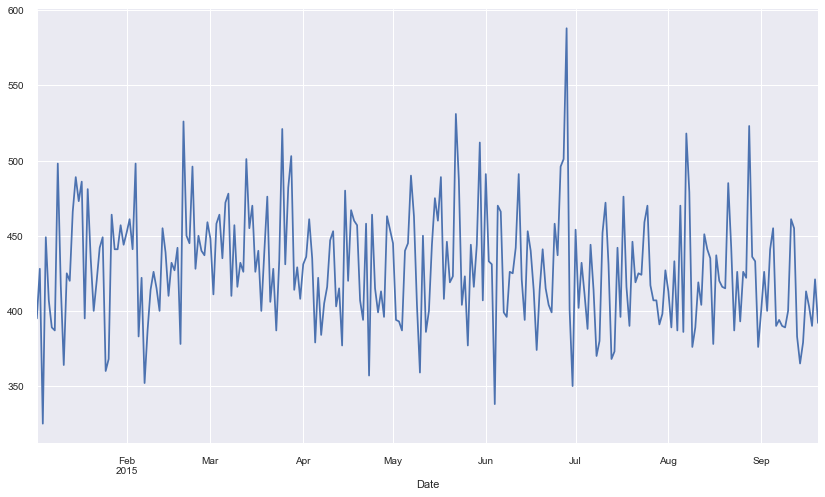

In [272]:
plt.figure(figsize=(14, 8))
ts1.plot()
plt.show()

In [209]:
uber = pd.read_csv('data/Uber Request Data 2.csv', header = 0)

In [210]:
def clean_column_name (column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ','_')
        c = c.lower().replace('*','')
        c = c.lower().replace('?','')
        clean_column_names.append(c)
    
    return clean_column_names

uber.columns = clean_column_name(uber.columns)

In [211]:
uber.dtypes

request_id             int64
pickup_point          object
driver_id            float64
status                object
request_timestamp     object
drop_timestamp        object
dtype: object

In [212]:
uber['request_timestamp'] = pd.to_datetime(uber['request_timestamp'])
uber['drop_timestamp'] = pd.to_datetime(uber['drop_timestamp'])

In [213]:
uber.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [214]:
uber.dtypes

request_id                    int64
pickup_point                 object
driver_id                   float64
status                       object
request_timestamp    datetime64[ns]
drop_timestamp       datetime64[ns]
dtype: object

In [215]:
uber.isnull().any()

request_id           False
pickup_point         False
driver_id             True
status               False
request_timestamp    False
drop_timestamp        True
dtype: bool

In [216]:
uber.isnull().sum()

request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64

In [343]:
uber.describe()

,request_id,driver_id,hour
count,6745.000000,4095.000000,6745.000000
mean,3384.644922,149.501343,12.956709
std,1955.099667,86.051994,6.504052
min,1.000000,1.000000,0.000000
25%,1691.000000,75.000000,7.000000
50%,3387.000000,149.000000,13.000000
75%,5080.000000,224.000000,19.000000
max,6766.000000,300.000000,23.000000


In [281]:
print("(",uber.request_timestamp.min(), ",",uber.request_timestamp.max(),")")
print("(",uber.drop_timestamp.min(), ",",uber.drop_timestamp.max(),")")

( 2016-07-13 00:00:24 , 2016-12-07 23:54:00 )
( 2016-07-13 00:01:12 , 2016-12-07 23:45:00 )


In [218]:
uber['pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [219]:
uber['status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [220]:
uber['status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: status, dtype: int64

In [221]:
uber.groupby('status').count()

,request_id,pickup_point,driver_id,request_timestamp,drop_timestamp
status,,,,,
Cancelled,1264,1264,1264,1264,0
No Cars Available,2650,2650,0,2650,0
Trip Completed,2831,2831,2831,2831,2831


In [222]:
#travel_time = pd.Timedelta(uber.iloc[3]['drop_timestamp']- uber.iloc[3]['request_timestamp']).seconds / 60

In [223]:
#for i in range(6744):
#travel_time = pd.Timedelta(uber.iloc[i]['drop_timestamp']- uber.iloc[i]['request_timestamp']).seconds / 60

In [304]:
uber_complete = uber[uber.drop_timestamp.notnull()]

In [305]:
uber_complete.isnull().sum()

request_id           0
pickup_point         0
driver_id            0
status               0
request_timestamp    0
drop_timestamp       0
weekday              0
hour                 0
dtype: int64

In [306]:
uber_complete.loc[:, 'travel_time'] = uber_complete.drop_timestamp - uber_complete.request_timestamp

In [307]:
weekday = uber_complete['request_timestamp'].dt.weekday_name
hour = uber_complete['request_timestamp'].dt.hour

In [311]:
uber_complete.dtypes

request_id                     int64
pickup_point                  object
driver_id                    float64
status                        object
request_timestamp     datetime64[ns]
drop_timestamp        datetime64[ns]
weekday                       object
hour                           int64
travel_time          timedelta64[ns]
dtype: object

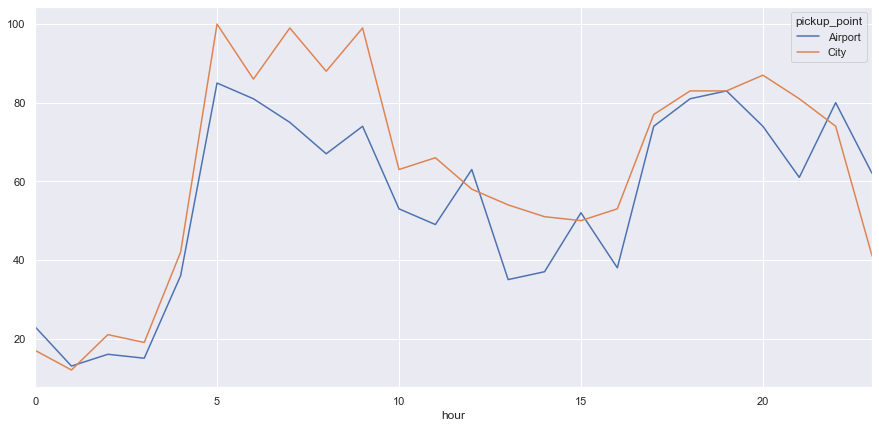

In [339]:
fig, ax = plt.subplots(figsize=(15,7))
uber_complete.groupby(['hour','pickup_point']).count()['request_id'].unstack().plot(ax=ax)
plt.show()

DataError: No numeric types to aggregate

In [317]:
uber_complete['travel_time'] = uber_complete['travel_time'].dt.seconds.astype('int64')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


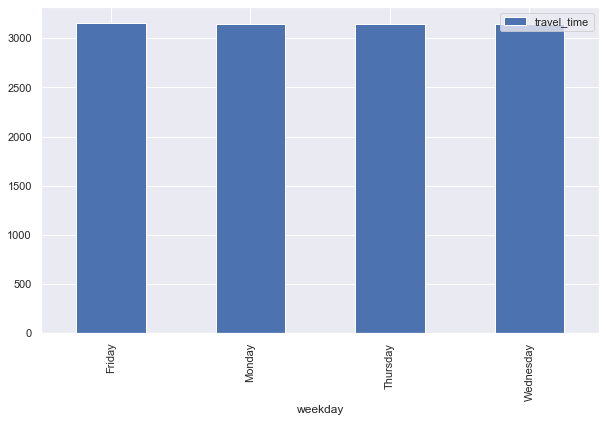

In [323]:
uber_complete.groupby(['weekday']).agg({'travel_time':'mean'}).plot(kind = "bar")
plt.show()

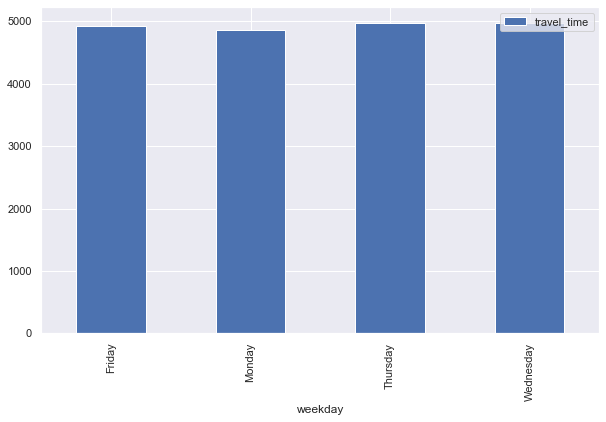

In [324]:
uber_complete.groupby(['weekday']).agg({'travel_time':'max'}).plot(kind = "bar")
plt.show()

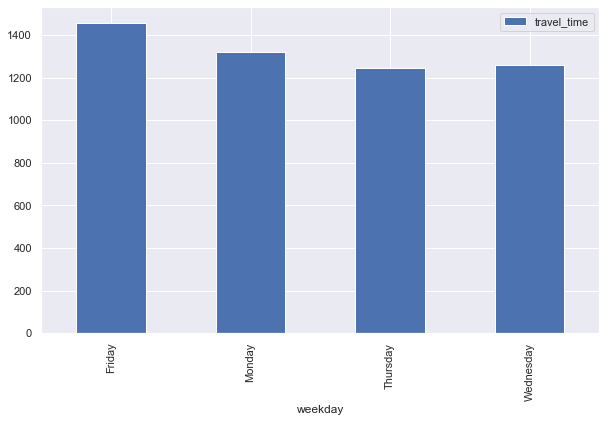

In [325]:
uber_complete.groupby(['weekday']).agg({'travel_time':'min'}).plot(kind = "bar")
plt.show()

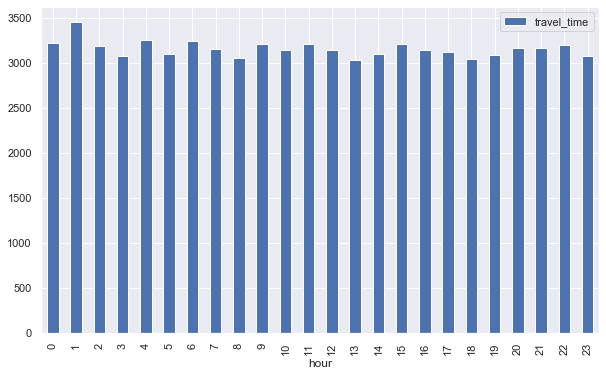

In [326]:
uber_complete.groupby(['hour']).agg({'travel_time':'mean'}).plot(kind = "bar")
plt.show()

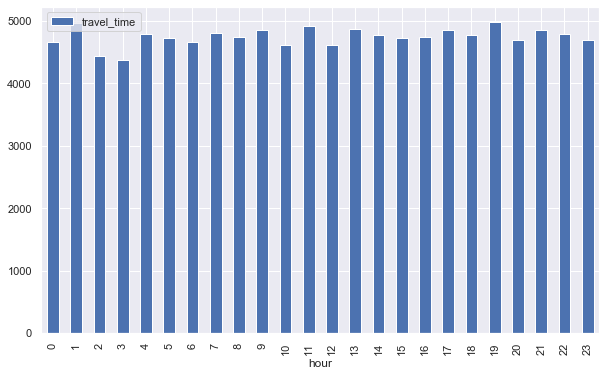

In [327]:
uber_complete.groupby(['hour']).agg({'travel_time':'max'}).plot(kind = "bar")
plt.show()

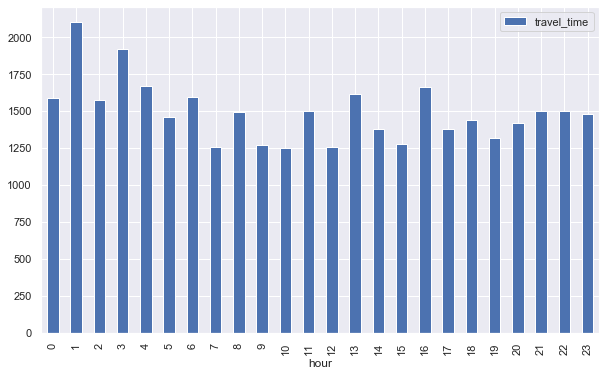

In [345]:
uber_complete.groupby(['hour']).agg({'travel_time':'min'}).plot(kind = "bar")
plt.show()

In [227]:
uber_complete.set_index(keys=['request_timestamp'], inplace=True)

In [228]:
uber_complete.index

DatetimeIndex(['2016-11-07 11:51:00', '2016-11-07 17:57:00',
               '2016-12-07 09:17:00', '2016-12-07 21:08:00',
               '2016-07-13 08:33:16', '2016-07-13 21:57:28',
               '2016-07-14 06:15:32', '2016-07-15 05:11:52',
               '2016-07-15 17:57:27', '2016-11-07 06:46:00',
               ...
               '2016-07-13 07:39:52', '2016-07-13 21:12:43',
               '2016-07-14 08:46:30', '2016-07-14 20:28:32',
               '2016-07-15 18:31:31', '2016-11-07 22:54:00',
               '2016-07-13 06:31:22', '2016-07-13 12:33:21',
               '2016-07-13 22:26:08', '2016-07-15 09:07:09'],
              dtype='datetime64[ns]', name='request_timestamp', length=2831, freq=None)

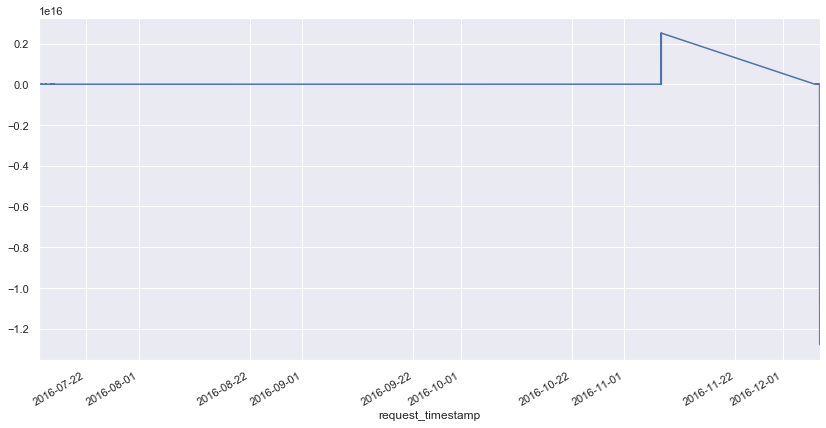

In [229]:
ts = uber_complete['travel_time']
plt.figure(figsize=(14, 7))
ts.plot()
plt.show()

In [235]:
weekday = uber['request_timestamp'].dt.weekday_name

In [236]:
hour = uber['request_timestamp'].dt.hour

In [239]:
uber.insert(loc = 6, column = "weekday", value = weekday)
uber.insert(loc = 7, column = 'hour', value = hour)

In [242]:
uber.groupby(uber.pickup_point).count()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,weekday,hour
pickup_point,,,,,,,,
Airport,3238,3238,1525,3238,3238,1327,3238,3238
City,3507,3507,2570,3507,3507,1504,3507,3507


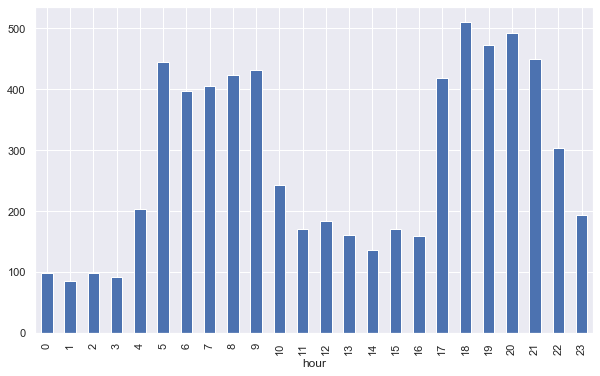

In [333]:
#days of the week where there are more/less uber requests to/from city
uber_subset1 = uber[['request_id', 'pickup_point','hour']] 
uber_subset1.groupby([uber_subset1.hour]).count()['pickup_point'].plot(kind = "bar")
plt.show()

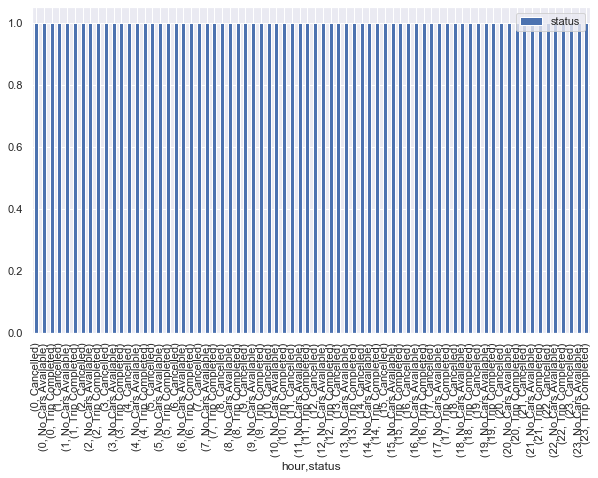

In [337]:
#days of the week where there are more/less completed/failed uber requests
uber_subset2 = uber[['request_id', 'status','hour']] 
uber_subset2.groupby([uber_subset2.hour, uber_subset2.status]).agg({'status': 'nunique'}).plot(kind = "bar")
plt.show()

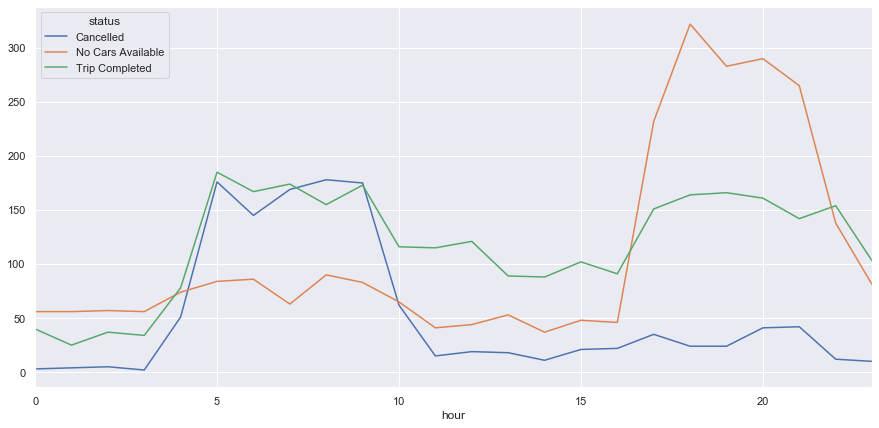

In [338]:
fig, ax = plt.subplots(figsize=(15,7))
uber_subset2.groupby(['hour','status']).count()['request_id'].unstack().plot(ax=ax)
plt.show()

In [278]:
uber_subset2.weekday.unique()

array(['Monday', 'Wednesday', 'Thursday', 'Friday'], dtype=object)